# Compile Hypotheses to Help Increase Revenue.

You are an analyst at a large online store. Together with the marketing department, you've compiled a list of hypotheses that can help increase revenue.

You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

The archive (hypotheses_us.csv) contains nine possibilities to increase the revenue of an online store with Reach, Impact, Confidence and Effort specified for each.

A/B test was perfomed and obtained the results described in the and (orders_us.csv) and (visitors_us.csv)

## Load data and prepare it for analysis

### Initialization

In [61]:
# Load the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Load Data

In [62]:
# Laod data containing nine hypotheses
hypo_df = pd.read_csv("/datasets/hypotheses_us.csv", sep = ';')
hypo_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [63]:
# Laod data for A/B test orders result
orders_df = pd.read_csv("/datasets/orders_us.csv", sep = ',',  parse_dates = ["date"])
orders_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


In [64]:
# Laod data for A/B test visitors result
visits_df = pd.read_csv("/datasets/visits_us.csv", sep = ',',  parse_dates = ["date"])
visits_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


## Prioritizing Hypotheses

### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [65]:
# Calculate the ICE score
hypo_df['ICE score'] = (hypo_df['Impact'] * hypo_df['Confidence']) / hypo_df['Effort']
hypo_df = hypo_df.sort_values(by='ICE score', ascending=False)

hypo_df

,Hypothesis,Reach,Impact,Confidence,Effort,ICE score
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


Based on the ICE framework analysis, the top priority hypotheses are:

Launching a promotion with discounts, adding new traffic channels, and incorporating subscription forms on main pages.

### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [66]:
# Calculate the RICE score
hypo_df['RICE score'] = (hypo_df['Reach'] * hypo_df['Impact'] * hypo_df['Confidence']) / hypo_df['Effort']
hypo_df = hypo_df.sort_values(by='RICE score', ascending=False)

hypo_df

,Hypothesis,Reach,Impact,Confidence,Effort,ICE score,RICE score
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Based on the RICE framework analysis, the top priority hypotheses are:

Adding a subscription form to all main pages, followed by adding product recommendation blocks and adding two new channels for attracting traffic.

### Show how hypothesis prioritization changes when you use RICE instead of ICE. Give an explanation for the changes.

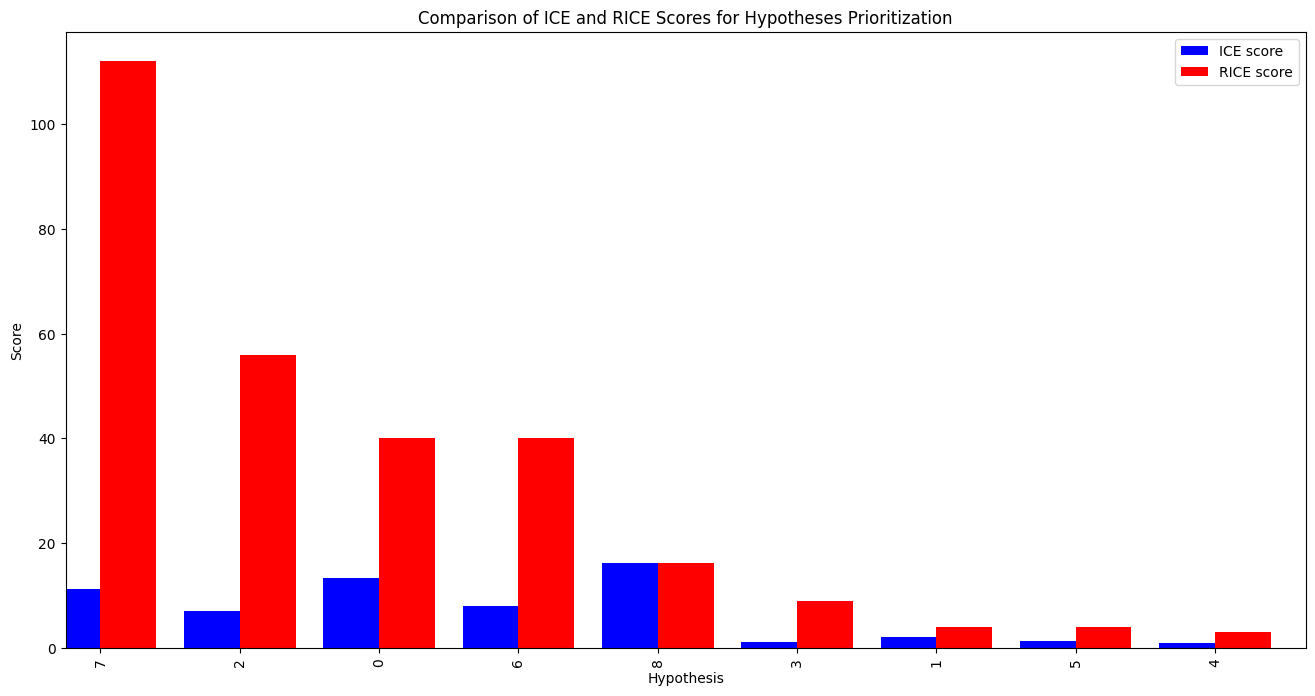

In [67]:
# Plot the ICE and RICE scores
fig, ax = plt.subplots(figsize=(16, 8))

# Plot ICE scores
hypo_df['ICE score'].plot(kind='bar', width=0.4, position=1, ax=ax, label='ICE score', color='Blue')

# Plot RICE scores
hypo_df['RICE score'].plot(kind='bar', width=0.4, position=0, ax=ax, label='RICE score', color='Red')

plt.title('Comparison of ICE and RICE Scores for Hypotheses Prioritization')
plt.xlabel('Hypothesis')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()

plt.show()

Add a subscription form to all the main pages: This hypothesis moves from third place in ICE to first in RICE due to its high reach. It impacts a large number of users, which significantly boosts its RICE score.

Add product recommendation blocks to the store: This hypothesis jumps from fifth place in ICE to second in RICE, again due to its higher reach.

Show banners with current offers and sales: This hypothesis moves up slightly due to the reach factor, tying for third place in RICE

Launch a promotion that gives users discounts: This hypothesis drops from first in ICE to fifth in RICE because, despite its high impact and confidence, its reach is lower than other initiatives.

Change the category structure, launch your own delivery service, add a customer review page, and change the background color: These hypotheses remain low priority in both frameworks, as their lower impact and reach do not justify higher prioritization.

As we can notice from the graph that the addition of the "Reach" factor in the RICE framework significantly affects prioritization.

Hypotheses with a high reach are given higher priority because they affect a larger number of users, potentially offering greater overall benefits. This causes initiatives that impact more users to move up in priority, while those with high impact but limited reach move down.

Prioritizing using RICE offers a more comprehensive perspective by accounting for the number of users impacted, ensuring resources are directed towards initiatives with the widest influence.

## A/B Test Analysis

### Plot chart of the cumulative revenue by group. Draw conclusions and create conjectures.

In [68]:
# Constructing a vector with values of unique pairs of date groups 
datesGroups = orders_df[['date','group']].drop_duplicates()


# Getting daily cumulative aggregated data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders_df[np.logical_and(orders_df['date'] <= x['date'], orders_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(ordersAggregated.head())

# Getting daily cumulative aggregated data on visitors 
visitorsAggregated = datesGroups.apply(lambda x: visits_df[np.logical_and(visits_df['date'] <= x['date'], visits_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(visitorsAggregated.head())

          date group  transactionId  visitorId  revenue
55  2019-08-01     A             24         20   2356.8
66  2019-08-01     B             21         20   1620.0
175 2019-08-02     A             44         38   3860.3
173 2019-08-02     B             45         43   4243.8
291 2019-08-03     A             68         62   5675.5
          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845


In [69]:
# Merging the two tables into one and giving descriptive names to their columns
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData)

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   2356.8       719
1  2019-08-01     B      21      20   1620.0       713
2  2019-08-02     A      44      38   3860.3      1338
3  2019-08-02     B      45      43   4243.8      1294
4  2019-08-03     A      68      62   5675.5      1845
..        ...   ...     ...     ...      ...       ...
57 2019-08-29     B     596     544  87343.0     17708
58 2019-08-30     A     545     493  63563.5     18037
59 2019-08-30     B     620     567  90736.3     18198
60 2019-08-31     A     557     503  64554.9     18736
61 2019-08-31     B     640     586  92840.6     18916

[62 rows x 6 columns]


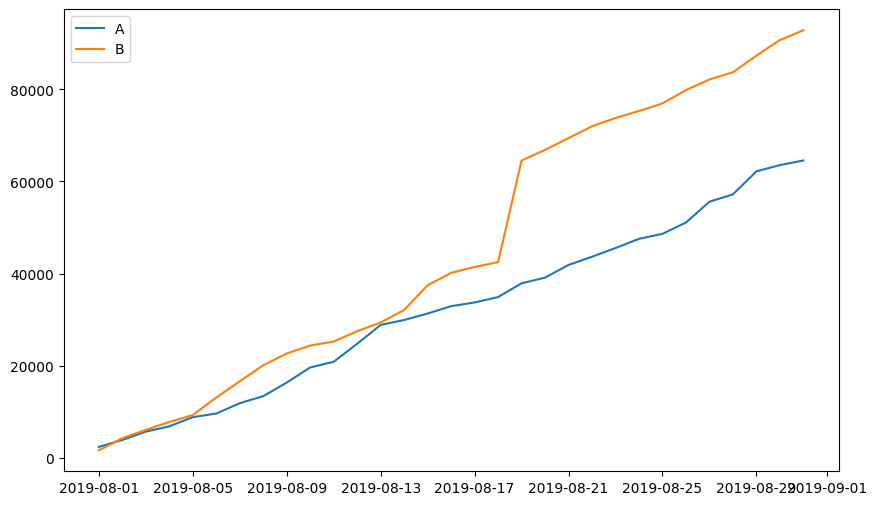

In [70]:
#Plot charts of the daily cumulative revenue and the A/B test group:

# DataFrame with Cumulative Order & Cumulative Revenue per Day, Group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with Cumulative Order & Cumulative Revenue per Day, Group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 6))
# building the revenue chart of group A 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# building the group B revenue chart 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

As we can conclude, both Groups show steady growth in revenue throughout the test, with Group B leading the numbers, which is great. Although, we can observe that both groups have revenue peaks at certain points. This may suggest both an increase in the number of orders and also the presence of outliers such as very expensive orders in the sample.

### Plot chart of the average cumulative order size by group. Draw conclusions and create conjectures.

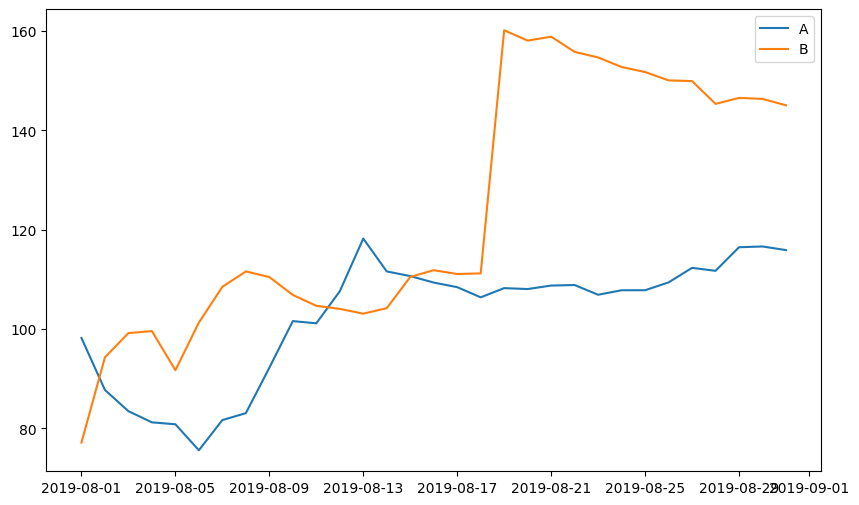

In [71]:
# Plot chart of the average cumulative order size by group
# Divide the cumulative revenue by the cumulative order quantity

plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

The average cumulative order size for Group A initially fell, indicating a period of decreased order value or performance. It then increased and stabilized toward the end of the test, showing recovery and stabilization in order size.

Group B average cumulative order size increased from the beginning, stabilized in the middle of the test, and then experienced a significant increase (hike) before falling at the end of the test. This suggests variability in order sizes, with some very large orders impacting the overall average.

The variability in Group B’s average order size indicates that additional data might be necessary to accurately determine its true average cumulative order size. 

### Plot a chart of the relative difference in the cumulative average order size for group B compared to group A. Make conclusions and create conjectures.

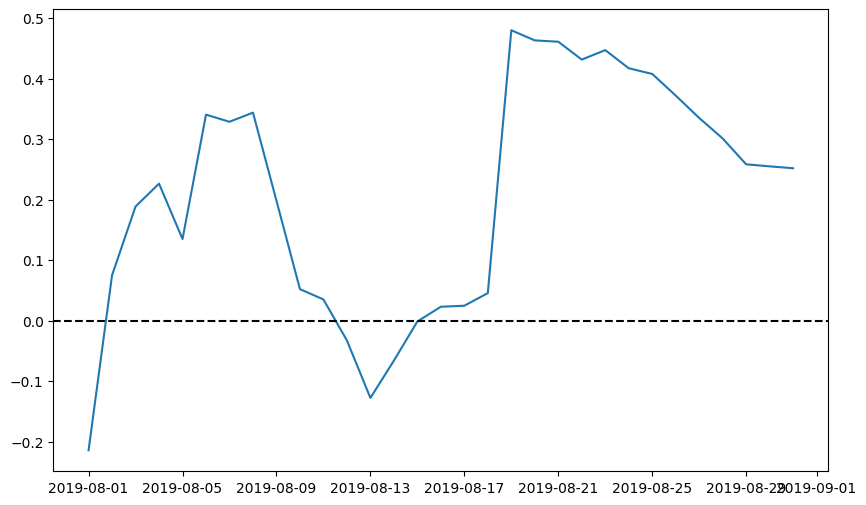

In [72]:
# Merge the CumulativeRevenue data of both group
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Build a relative difference chart for cumulative average order size
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Adding the X-axis
plt.axhline(y=0, color='black', linestyle='--')

From the graph we can conclude that, the relative difference in the cumulative average order size for group B is greater than compared to group A most of the time. However, this difference between the groups peaks at several points, which indicates the occurrence of large orders and outliers. We will find them in the cotinuation of our analysis.

The higher relative difference for Group B may indicate that this group has a higher frequency of large orders or more extreme values compared to Group A.

The presence of large orders in Group B might suggest that specific strategies, promotions, or customer segments are contributing to higher average order sizes. Investigating these factors could provide actionable insights for optimizing performance in both groups.

If the large orders or peaks are significant, they might offer opportunities for targeted strategies or adjustments to maximize revenue. Conversely, if these outliers are identified as anomalies, focusing on more consistent patterns may be beneficial.

### Calculate the conversion rate for each group as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and create conjectures.

(0.0, 0.05)

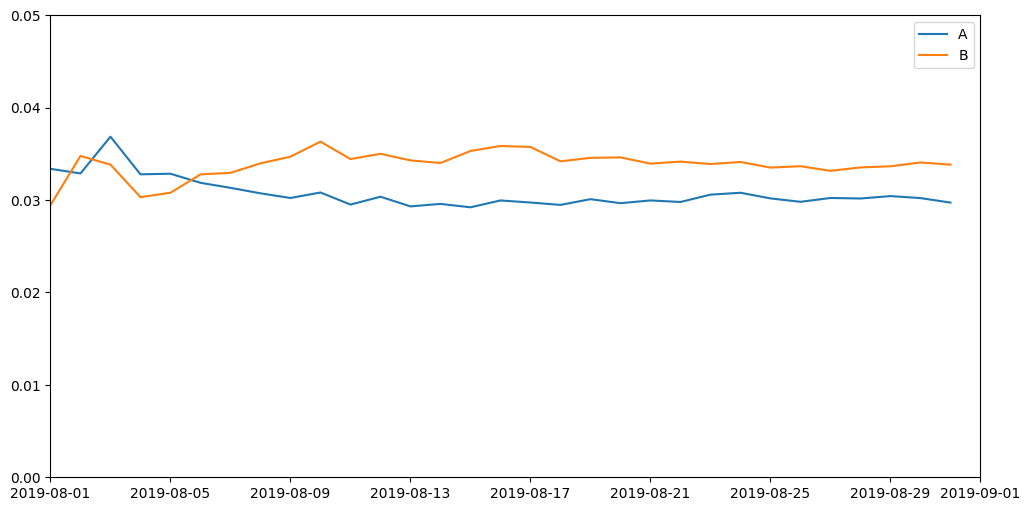

In [73]:
# Calculating Cumulative Conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# select data of group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# select data of group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Plot the Charts
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# Defining the scale of the axes
plt.xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2019-09-01'))
plt.ylim(0, 0.05)

We can conclude that the groups were fluctuating around the same value, but the conversion rate of group B rose before stabilizing, while the conversion rate of group A fell, and then became stable. Both groups eventually stabilized, indicating that any initial volatility or changes were temporary, and both groups reached a steady state.

If Group B had any new strategies or interventions implemented, these might have contributed to the initial rise in conversion rate. The decline in Group A's conversion rate might be attributed to seasonal factors or external influences

Group B's rise and subsequent stabilization could suggest market saturation or a positive response to a promotional activity. Similarly, Group A's decline could indicate a response to market conditions or decreased effectiveness of previous strategies.

Changes in conversion rates could also reflect shifts in customer behavior or preferences. Analyzing customer feedback or engagement metrics during these periods might provide further insights

### Plot a chart of the relative difference in cumulative conversion for group B compared to group A. Draw conclusions and conjecture.

(-0.4, 0.4)

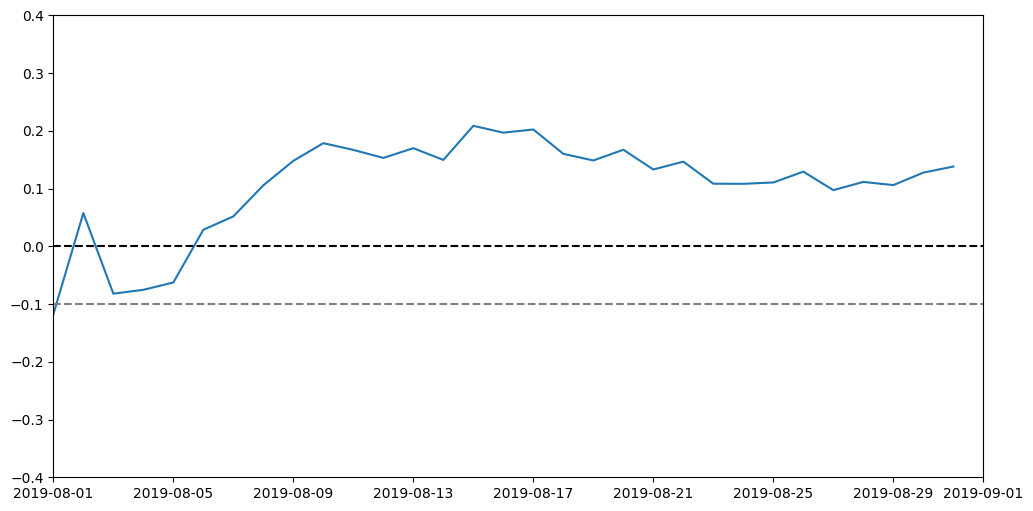

In [74]:
#Merge the Cumulative Convertion data of both group

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Plot the Chart
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# Defining the scale of the axes
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2019-09-01'))
plt.ylim(-0.4, 0.4)

At the beginning of the test, Group B was lagging behind Group A in terms of conversion rates. Suddenly, Group B experienced a significant improvement, overtaking Group A and leading in conversion rates. After this initial surge, Group B’s conversion rates stabilized and maintained a leading position throughout the remainder of the test.

The rise in Group B’s conversion rate could reflect a successful adaptation to market conditions or customer preferences, leading to better performance compared to Group A. Group B’s ability to maintain its leading position suggests that the improvements were not just short-lived but had a lasting impact on performance.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [75]:
#Calculate number or orders per user
ordersByUsers = orders_df.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

# Rename columns name    
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

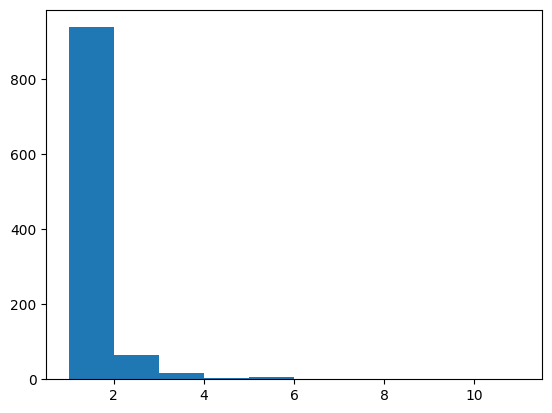

In [76]:
#Plot a histogram
plt.hist(ordersByUsers['orders'])

Most customers have placed only one order. However, a significant portion made two to four requests each.

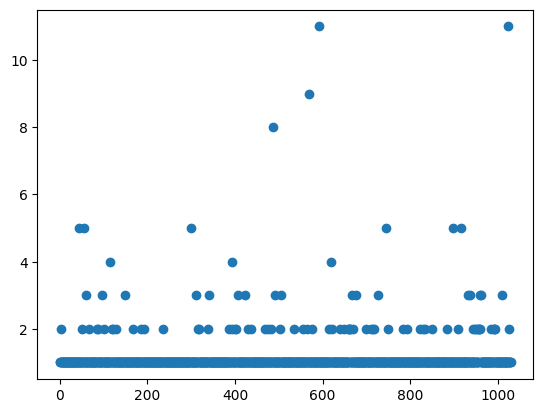

In [77]:
#Build a scatter plot with the number of orders per user:

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

Our conclusions have been confirmed: there are indeed many users who have placed two to four orders. We don't yet know what the exact breakdown is, as it's unclear whether or not we should consider these anomalies

In [78]:
# calculate percentiles for the number of orders per user
print('The 95th and 99th percentiles for the number of orders per user are:\n', np.percentile(ordersByUsers['orders'], [95, 99]))

The 95th and 99th percentiles for the number of orders per user are:
 [2. 4.]


Less than 1% of users placed more than 4 orders, and less than 5% of users placed more than 2 orders.

Although, it would be reasonable to set 2 requests per user as the minimum threshold for the number of requests, and values exceeding 4 requests per user are considered anomalies 

### Make a scatter plot of order revenues. Draw conclusions and create conjectures.

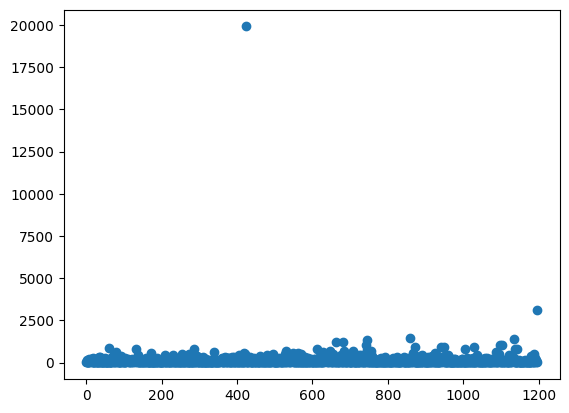

In [79]:
#Plot Scatter Graph

x_values = pd.Series(range(0,len(orders_df['revenue'])))
plt.scatter(x_values, orders_df['revenue'])

Most orders are below 2,500, indicating that high-value transactions are rare. There are notable outliers at approximately 3,000 and 200,000. The 200,000 order is particularly unusual and stands out as an abnormal data point.

The presence of significant outliers could influence the average order value and overall revenue analysis. Understanding these outliers can help refine revenue calculations and business strategies.

### Calculate the 95th and 99th percentiles of order revenue. Define the point at which a data point becomes an anomaly.

In [80]:
# calculate percentiles for orders revenue
print('The 95th and 99th percentiles for order revenue are:\n', np.percentile(orders_df['revenue'], [95, 99]))

The 95th and 99th percentiles for order revenue are:
 [435.54  900.904]


Less than 1% of orders has a return of more than 900.90, and less than 5% of orders has a return of more than 435.54.

Although, it would be reasonable to have orders with a revenue of 435.54 as the minimum threshold for orders revenue, and values exceeding 900.90 are considered anomalies 

### Find the statistical significance of the difference in conversion between the groups using the raw data. Draw conclusions and create conjectures.

In [81]:
#Create order by users for each group
ordersByUsersA = orders_df[orders_df['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_df[orders_df['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

#Declare the variables with users from different groups and corresponding order quantities
#Concatenate list of the number of orders per user with an object refering to Zeros for users who have not placed any orders
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#Print the relative conversion gain for group B (Round the value to three decimal places)
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


The p-value obtained from the test is 0.017, which is less than the significance level of 0.05.
This indicates that we can reject the null hypothesis. Therefore, there is a statistically significant difference in the conversion rates between groups A and B based on the new dataresults.

With a conversion rate of 0.138 for group B, Group B has a relative gain over Group A by 13.8%

As we can notice, the strategies or changes implemented in group B were successful in improving conversion rates. Differences in user demographics, marketing channels, or user interface might have contributed to group B's higher conversion rate.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Draw conclusions and create conjectures.

In [82]:
#Print the relative difference in average order size between the groups (Round the value to three decimal places)
print('{0:.3f}'.format(st.mannwhitneyu(orders_df[orders_df['group']=='A']['revenue'], orders_df[orders_df['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_df[orders_df['group']=='B']['revenue'].mean()/orders_df[orders_df['group']=='A']['revenue'].mean()-1))

0.692
0.252


The p-value of 0.692 is significantly higher than the significance level of 0.05.
This indicates that we cannot reject the null hypothesis. Therefore, there is no statistically significant difference in the average order size between groups A and B.

Despite the lack of statistical significance, the average order size of group B is higher than that of group A, with a relative increase of 25.2%

The higher average order volume in group B suggests that the strategies or changes implemented may have had a positive impact, even if not statistically significant. There is an opportunity to analyze and adopt the successful elements from group B to improve the average order volume in group A.

The current sample size may not be large enough to detect a significant difference. A larger sample size might provide more power to the statistical test.

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Draw conclusions and create conjectures.

Define anomalous users as those who place more than 4 orders or one order greater than 900.90.

Make data slices with users who have placed more than 4 orders (usersWithManyOrders) and with users who placed orders greater than 900.90 (usersWithExpensiveOrders). Let's put them together in a table called abnormalUsers.

In [83]:
#Find out the total amount of anomalous users

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders_df[orders_df['revenue'] > 900.90]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers)
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
326     2378935119
278     2458001652
940     4003628586
743     4133034833
499     4256040402
662     4266935830
dtype: int64
(15,)


We have 15 anomalous users in total.

Will try to find out how their actions affected the test results.

In [84]:
#Calculate the statistical significance of differences in conversion between groups, using filtered data
#Prepare samples of the total order quantity for each test group

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

#Apply the Mann-Whitney statistical criterion
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


As we can see that the results are almost same with a small difference

The p-value of 0.014 is less than the significance level of 0.05.
This indicates that we can reject the null hypothesis and conclude that there is a statistically significant difference in the conversion rates between groups A and B.

Group B shows a small increase (1.5%) in conversion rate to be 15.3% over Group A. This suggests that group B performed significantly better in terms of conversion rates.

Filtering the data resulted in a slightly lower p-value and a marginally higher relative increase, indicating that filtering had a minor impact on the overall conclusions.

The similarity in results between filtered and non-filtered data demonstrates the robustness of the findings, suggesting that group B's higher conversion rate is a reliable outcome.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Draw conclusions and create conjectures.

In [85]:
# Print the  statistical significance of the difference in average order size between the groups using the filtered data

print('{0:.3f}'.format(st.mannwhitneyu(orders_df[np.logical_and(orders_df['group']=='A',
    np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'],orders_df[np.logical_and(orders_df['group']=='B',
    np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(orders_df[np.logical_and(orders_df['group']=='B',
    np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders_df[np.logical_and(orders_df['group']=='A',
    np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.819
-0.006


As same as non-filtered data, the p-value which is 0.819, is much higher than 0.05, indicating no statistically significant difference in average order size between Groups A and B.

The difference in average order size is -0.006, suggesting that Group B's average order size is slightly lower than Group A's, though not significantly.

Filtering the data did not lead to a significant difference in average order size between the groups. The slight negative difference in the filtered data suggests that filtering might have removed some higher-value orders from group B.

The filtered data continued to show no statistically significant difference in average order size between Groups A and B, indicating consistency in the lack of effect.

Since there is no significant difference in average order size, focus on strategies that have proven effective in improving conversion rates, as seen in group B.

Marketers should investigate external factors that might be affecting average order size, such as seasonal variations, marketing campaigns, or changes in user behavior.

## Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

Both the non-filtered and filtered data show a statistically significant improvement in conversion rates for Group B over Group A. This is a strong indicator that Group B's strategies are more effective in driving conversions.

Although there is no statistically significant difference in average order size, the conversion rates are a more critical metric for this analysis. The lack of significance in average order size does not overshadow the consistent and statistically significant improvement in conversion rates seen in Group B

The graphical analysis shows that group B experienced a significant improvement and maintained a leading position in conversion rates after an initial surge, further supporting the conclusion that group B is performing better.

Therefore, based on the analysis above, it is reasonable to stop the test and consider group B as the leader due to its statistically significant higher conversion rates.